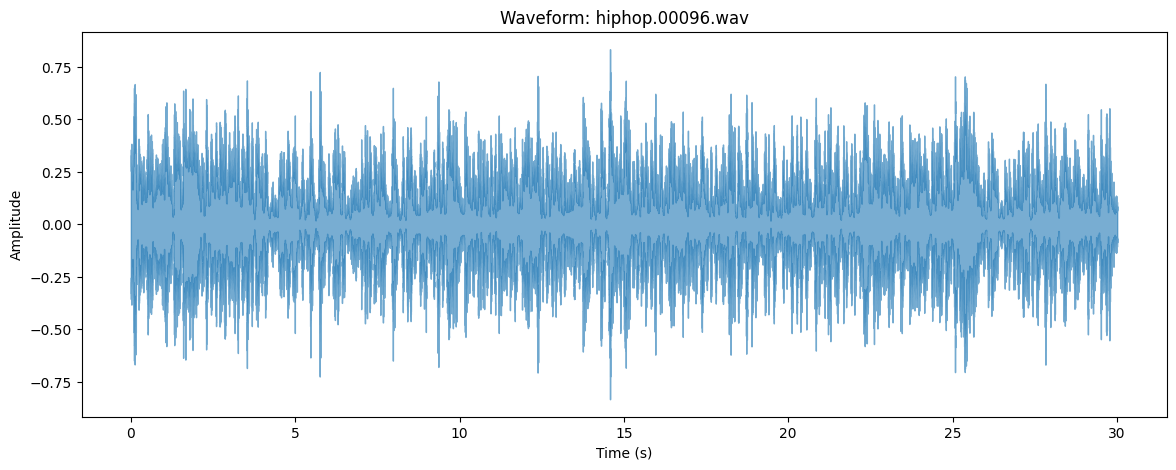

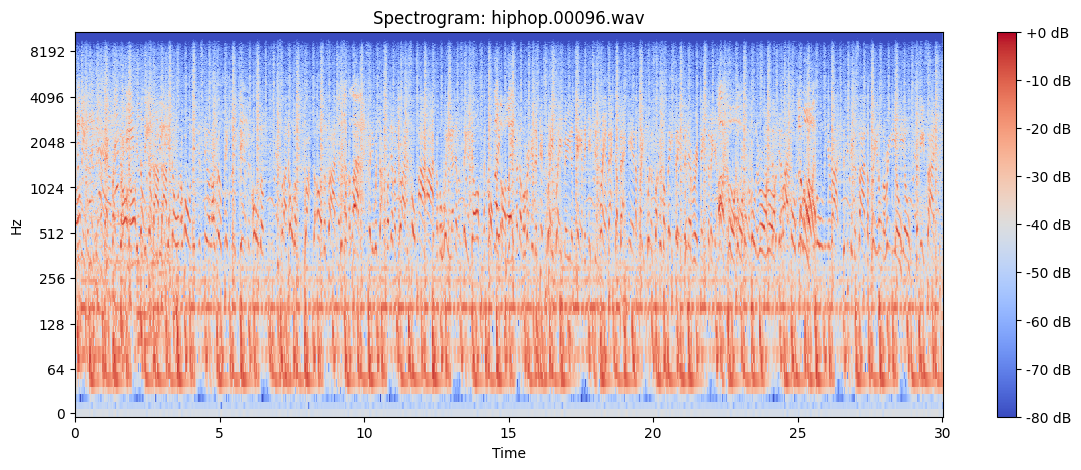

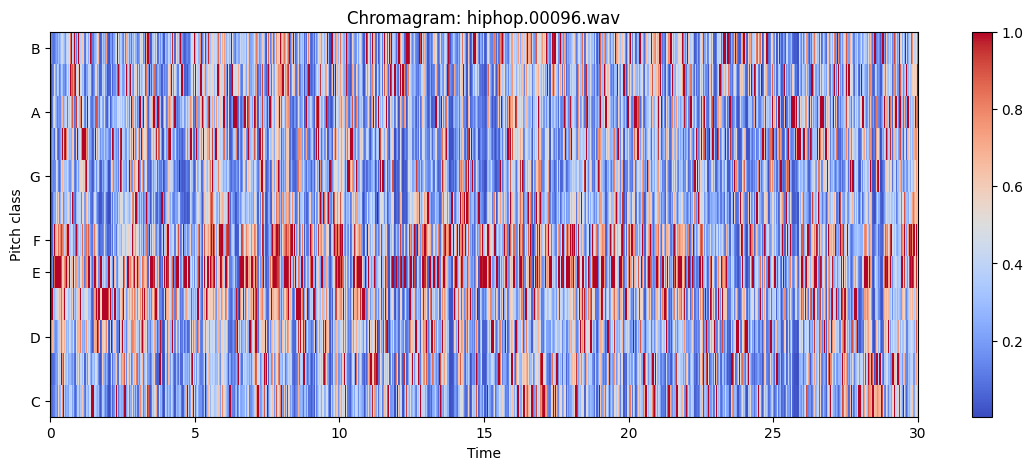

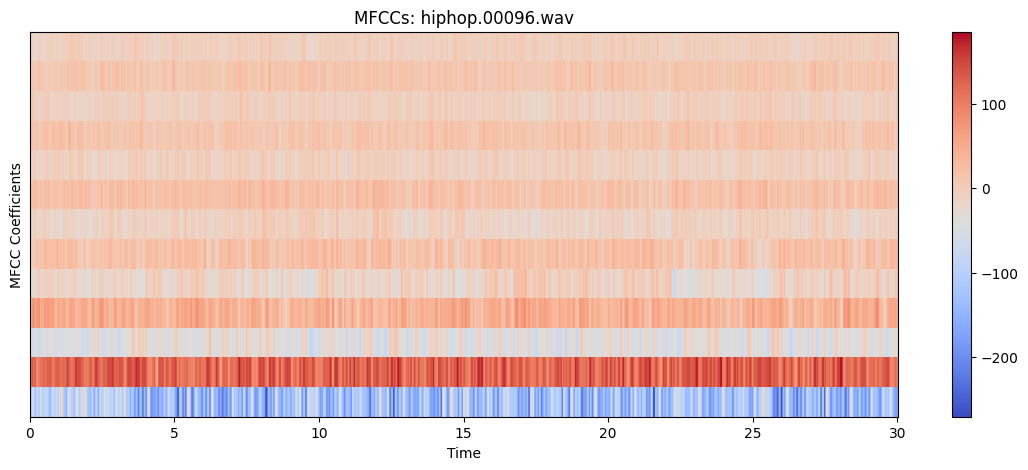

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Function to visualize an audio file
def visualize_audio(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Plot 1: Waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr, alpha=0.6)
    plt.title(f"Waveform: {os.path.basename(file_path)}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

    # Plot 2: Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.title(f"Spectrogram: {os.path.basename(file_path)}")
    plt.colorbar(format="%+2.0f dB")
    plt.show()

    # Plot 3: Chromagram
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.title(f"Chromagram: {os.path.basename(file_path)}")
    plt.colorbar()
    plt.show()

    # Plot 4: MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, x_axis='time', cmap='coolwarm')
    plt.title(f"MFCCs: {os.path.basename(file_path)}")
    plt.colorbar()
    plt.ylabel("MFCC Coefficients")
    plt.show()

# Load the features dataset
data_path = "../data/gtzan_features_1.csv"
df = pd.read_csv(data_path)

# Pick a random file from the dataset
random_file = df['filename'].sample(1).values[0]

# Visualize the random file
visualize_audio(random_file)